### Capital Project Data

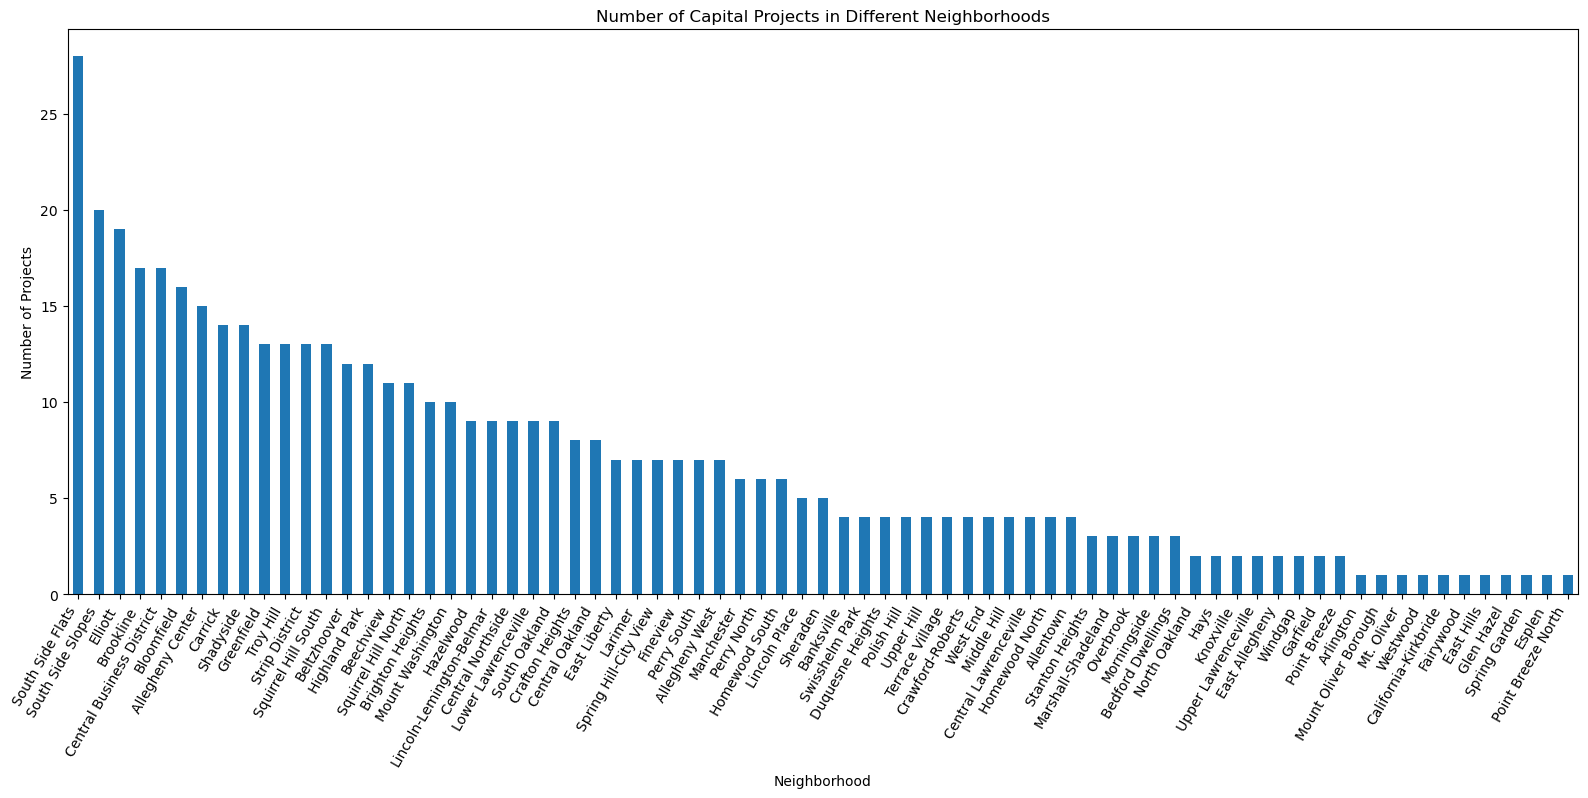

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

projects_csv = "https://data.wprdc.org/datastore/dump/2fb96406-813e-4031-acfe-1a82e78dc33c"
neighborhood_data = pd.read_csv(projects_csv, usecols=["neighborhood"])

neighborhood_counts = neighborhood_data["neighborhood"].value_counts()

plt.figure(figsize=(16, 8))  
neighborhood_counts.plot(kind='bar')

plt.title("Number of Capital Projects in Different Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Projects")
plt.xticks(rotation=60, ha='right')

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

plt.show()

### Police Incident Data

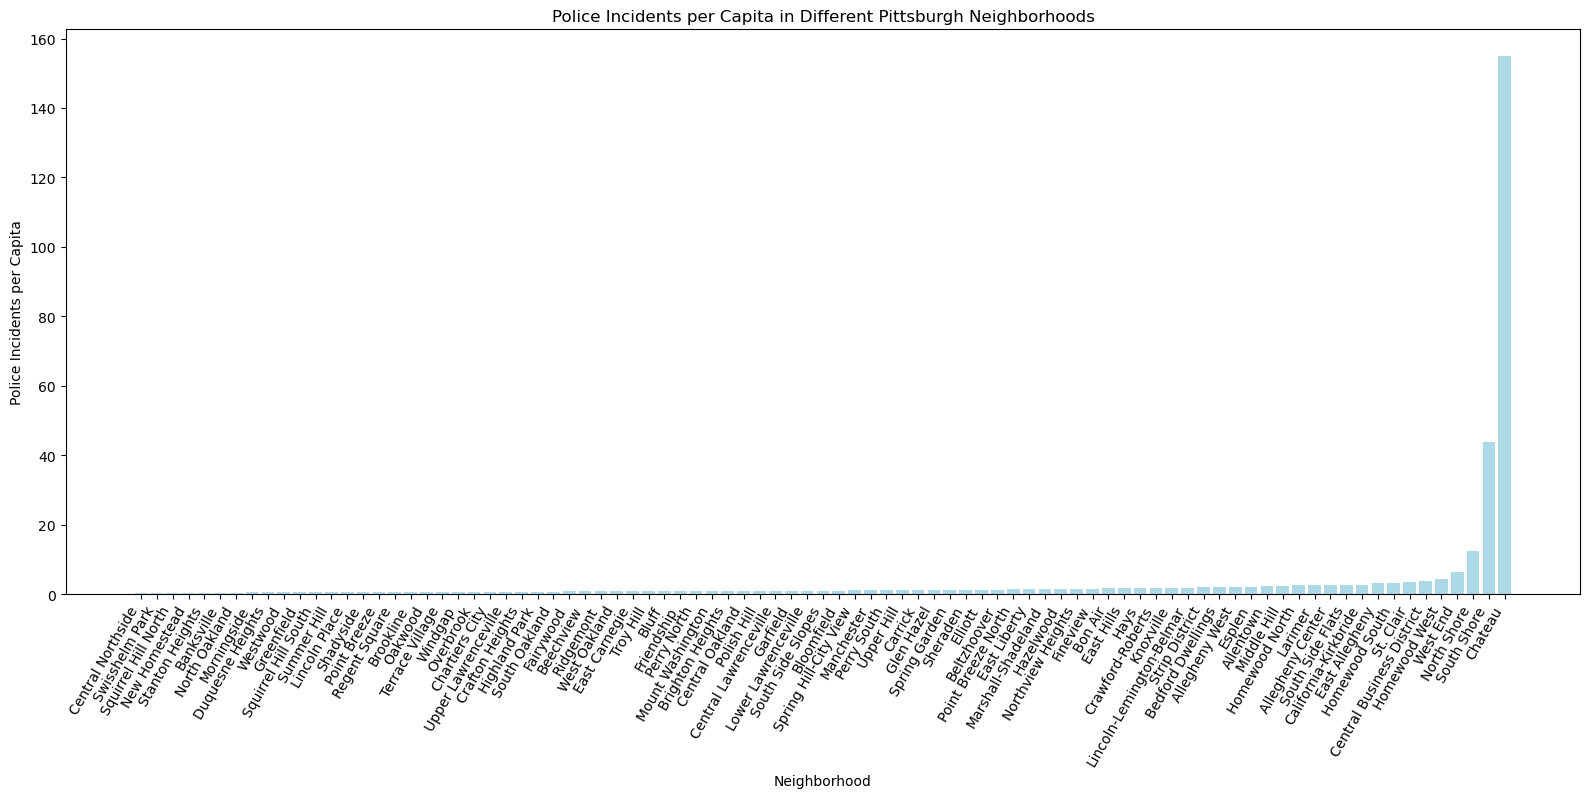

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

police_csv = "https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e"
police_data = pd.read_csv(police_csv, usecols=["INCIDENTNEIGHBORHOOD"])

population_csv = "https://data.wprdc.org/dataset/95af9f2c-61c8-446b-ae72-852e195684f3/resource/a8414ed5-c50f-417e-bb67-82b734660da6/download/preliminarycitypittsburghneighborhood_pl94171summary-2.csv"
population_data = pd.read_csv(population_csv, usecols=["Neighborhood", "2020_Total_Population"])
population_data['Neighborhood'] = population_data['Neighborhood'].replace("Central Business District (Downtown)", "Central Business District")
population_data['Neighborhood'] = population_data['Neighborhood'].replace("Spring Hill-City", "Spring Hill-City View")
population_data['Neighborhood'] = population_data['Neighborhood'].replace("Central North Side", "Central Northside")

population_data = population_data.dropna(subset=["Neighborhood"])

police_counts = police_data["INCIDENTNEIGHBORHOOD"].value_counts()

merged_data = pd.DataFrame({'Neighborhood': police_counts.index, 'Police Count': police_counts.values})
merged_data = pd.merge(merged_data, population_data, how='left', left_on='Neighborhood', right_on='Neighborhood')

merged_data['Police per Capita'] = merged_data['Police Count'] / merged_data['2020_Total_Population']

merged_data = merged_data.sort_values('Police per Capita', ascending=True)
merged_data = merged_data.iloc[:87]

plt.figure(figsize=(16, 8))
plt.bar(merged_data['Neighborhood'], merged_data['Police per Capita'], color='lightblue')

plt.title("Police Incidents per Capita in Different Pittsburgh Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Police Incidents per Capita")
plt.xticks(rotation=60, ha='right')

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

plt.show()
